In [1]:
import os
import re
import sys
import sklearn as skl
import math

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import sklearn.cluster

import glob

from data_grid import DataGrid

from sklearn.decomposition import PCA

from sklearn.decomposition import NMF

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

from sklearn.metrics import adjusted_mutual_info_score as ami_score

from sklearn.metrics import fowlkes_mallows_score as fm_score

from sklearn.metrics import adjusted_rand_score as ar_score

from data_grid_TiNiSn import DataGrid, DataGrid_TiNiSn_500C, DataGrid_TiNiSn_600C

from Agglo_cluster import Agglo_cluster

from peak_removal import peak_rem

import dataproc.operations

from dataproc.operations.hitp import bayesian_block_finder
from dataproc.operations.peakShapes import voigtFn
from NMF import nmf_func
from scipy.signal import find_peaks
from scipy.stats import pearsonr
from NMF_Cluster import nmf_cluster

In [2]:
dataGrid = DataGrid_TiNiSn_500C()
y_data=dataGrid.get_data_array()
x_data=dataGrid.data[1][:,0]

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)


In [3]:
truth_labels=list([4,4,4,4,4])+list([4,4,4,4,4,4,4,3,3])+list([4,4,4,4,4,4,4,3,3,3,3])+list([4,4,4,11,4,4,4,4,3,3,3,2,2])+list([4,4,4,11,11,4,4,4,3,3,2,2,1])+list([5,5,4,11,11,11,4,4,5,5,2,2,1,1,1])+list([6,5,5,11,11,11,4,5,5,2,2,1,1,1,1])+list([7,6,5,5,11,11,5,5,2,2,1,1,1,1,1])+list([7,7,6,5,5,5,5,10,10,2,1,1,1,1,1])+list([7,7,6,6,10,10,10,10,10,9,1,1,1,1,1])+list([8,8,6,6,6,6,9,9,9,1,1,1,1])+list([8,8,8,6,9,9,9,9,9,1,1,1,1])+list([8,8,6,9,9,9,9,1,1,1,1])+list([8,6,9,9,9,9,1,1,1])+list([9,9,9,1,1])

In [4]:
#This part of the code is a savior
new_truth_labels=[None]*177
for ii in range(0,177):
    x,y=dataGrid.coord(ii+1)
    new_grid=dataGrid.grid_num(16-x,y)
    new_truth_labels[new_grid-1]=truth_labels[ii]

# Optimal W & H from NMFk

In [5]:
optimal_W=np.array(pd.read_csv('C:\\Users\\oluwa\\Jupyter notebooks\\optimal_W_matrix.csv'))
optimal_H=np.array(pd.read_csv('C:\\Users\\oluwa\\Jupyter notebooks\\optimal_H_matrix.csv'))

In [6]:
np.shape(optimal_H)

(6, 177)

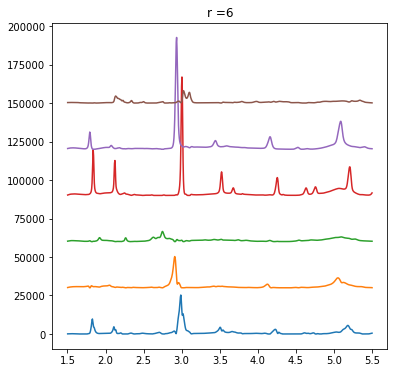

In [7]:
# View all the clusters/phases
fig, ax = plt.subplots(figsize=(6,6))
pp=0
for i in range(len(optimal_H)):
    #fig,ax = plt.subplots()
    #ax = fig.add_subplot(2,5,i+1)
    ax.plot(dataGrid.data[1][:,0], optimal_W[:,i]+pp)
    ax.set_title('r ='+str(i+1))
    pp+=30000

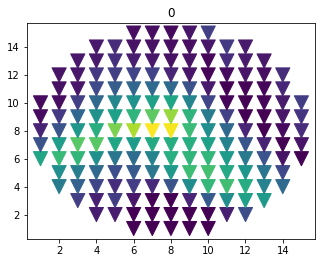

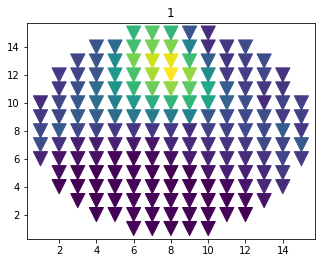

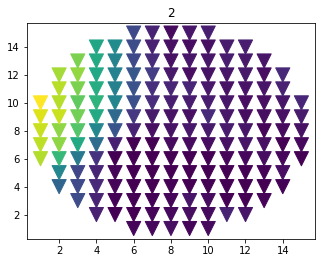

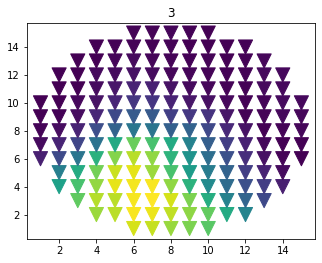

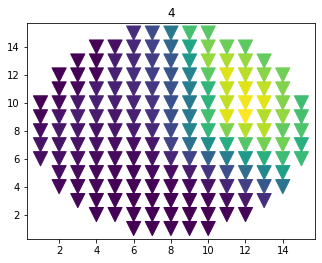

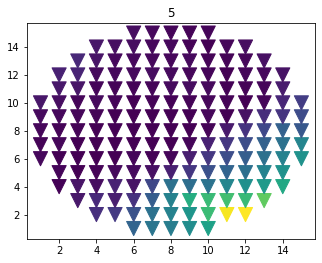

In [8]:
#View all the abundances of the phases

X=[]
Y=[]
for i in range(1,178):
    x,y=dataGrid.coord(i)
    #X.append(x)
    #Y.append(y)
    new_grid=dataGrid.grid_num(16-x,y)
    new_x,new_y=dataGrid.coord(new_grid)
    X.append(new_x)
    Y.append(new_y)
    
for val in range(0,len(optimal_H)):
    ax=plt.figure(figsize=(4,3)).add_axes([0,0,1,1])
    #ax=fig.add_axes([0,0,1,1])
    colors = optimal_H[val]/np.sum(optimal_H[val])
    ax.scatter(X,Y, c=colors, marker='v', s=200)
    ax.set_title(str(val))

### Use most abundant Cluster

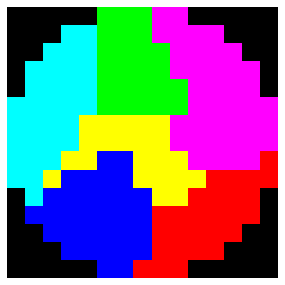

In [9]:
#Use just the most abundant cluster to get the wafer map
labels = []
for val in range(0,177):
    b = list(optimal_H[:,val])
    labels.append(b.index(max(b)))
    
#This part of the code is a savior
new_labels=[None]*177
for ii in range(0,177):
    x,y=dataGrid.coord(ii+1)
    new_grid=dataGrid.grid_num(16-x,y)
    new_labels[new_grid-1]=labels[ii]

hues = [float(float(x)/float(max(labels)+1)) for x in range(1,10)]
cluster_grid = np.zeros(shape = (15,15,3))
for val in range(1,178):
    x,y = dataGrid.coord(val)
    cluster = new_labels[val-1]
    cluster_grid[15-y][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
    

fig, ax = plt.subplots()
fig.tight_layout()
plt.imshow(cluster_grid)
#ax.invert_yaxis()
ax.axis("off")

k=.03
plt.subplots_adjust(left=k,right=(1-k),bottom=k,top=(1-k),wspace=k,hspace=k)


### Normal peak shift and cluster map

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


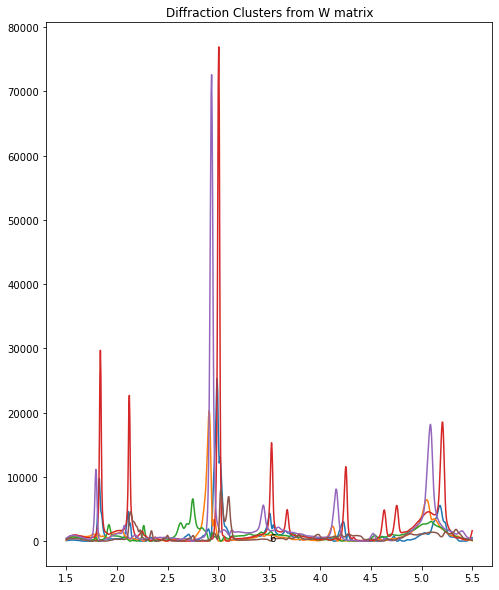

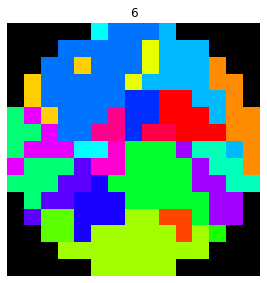

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


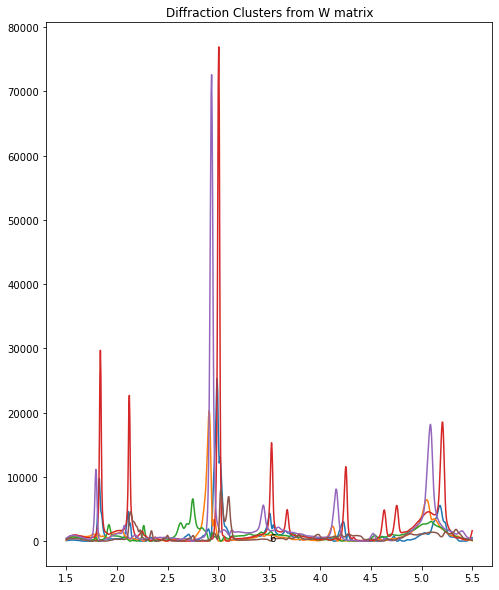

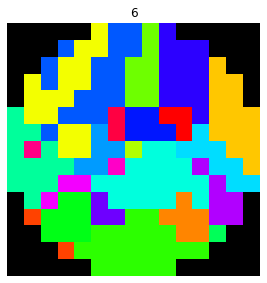

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


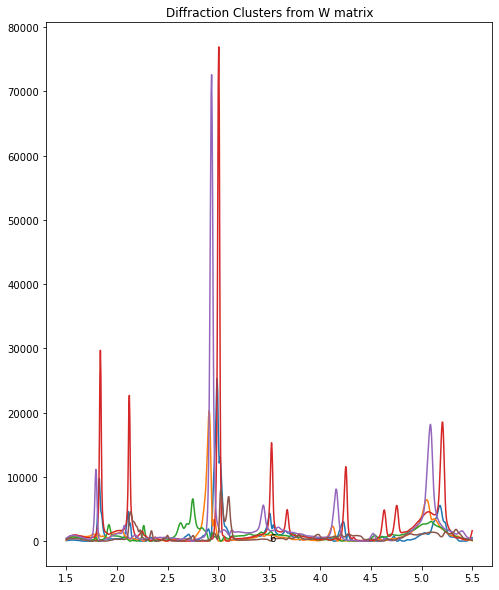

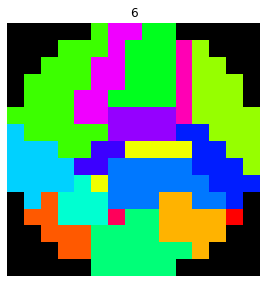

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


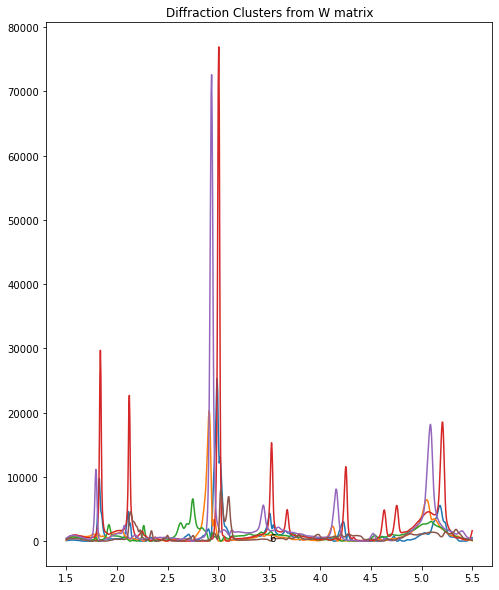

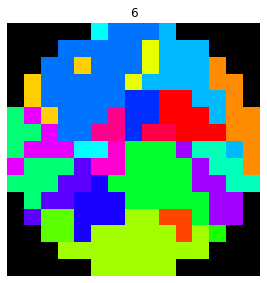

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


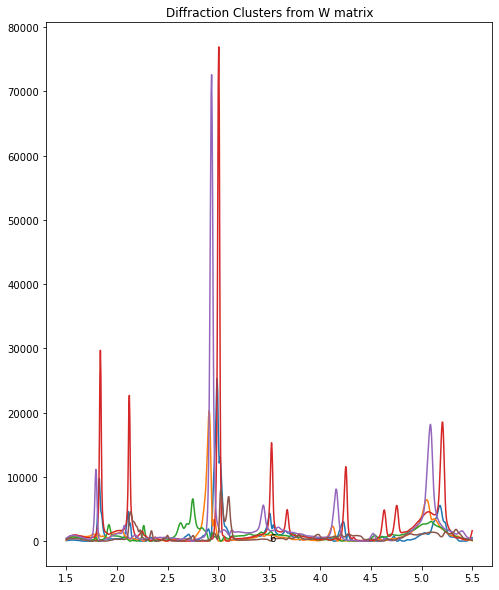

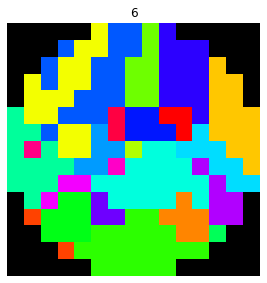

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


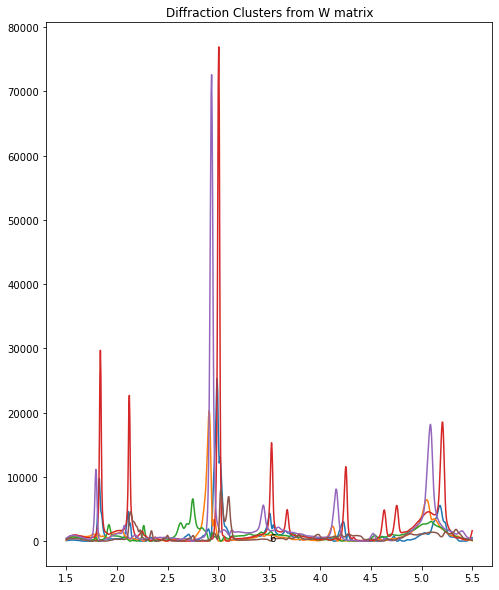

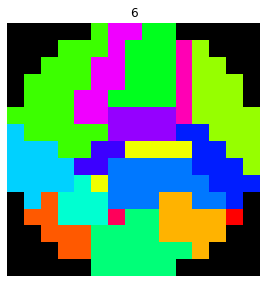

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


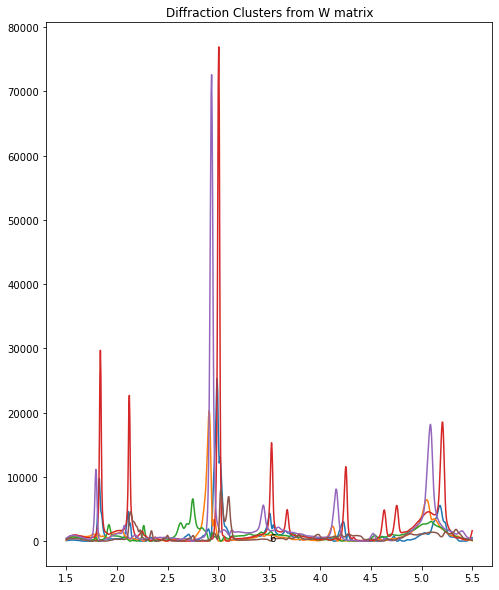

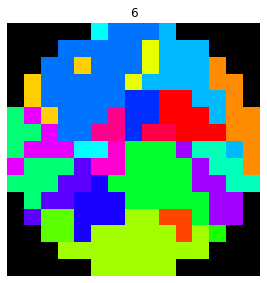

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


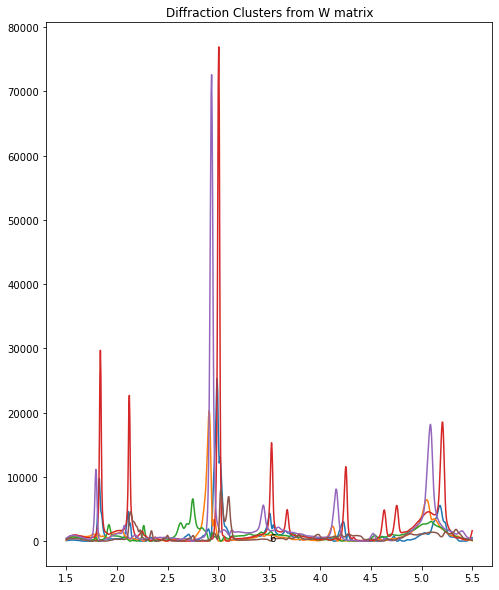

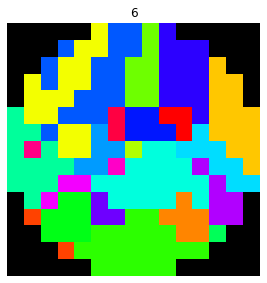

(1, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
.....................................6 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


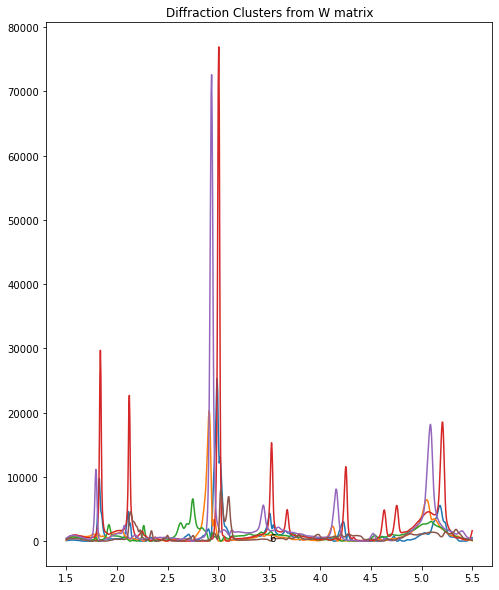

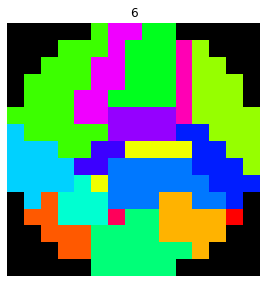

(1, 177)


In [10]:
Big_labels=[]
ami_score_nmfpk3=[]
ar_score_nmfpk3=[]
fm_score_nmfpk3=[]

for i in [0.7,0.8,0.9]:
    for j in [0.15,0.2,0.25]:
        labels = nmf_cluster(6,7,deal="optimal",use_peak=1,visualize=1,pear_threshold=i,peak_threshold=3,contri_threshold=j,dataset=1)
        print(np.shape(labels))
        ami_score_nmf = [ami_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ar_score_nmf= [ar_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        fm_score_nmf= [fm_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ami_score_nmfpk3= ami_score_nmfpk3+ami_score_nmf
        ar_score_nmfpk3=ar_score_nmfpk3+ar_score_nmf
        fm_score_nmfpk3=fm_score_nmfpk3+fm_score_nmf
        Big_labels=Big_labels + labels

In [11]:
print(np.shape(ami_score_nmfpk3))

(9,)


In [12]:
score_nmfpk3=[ami_score_nmfpk3,ar_score_nmfpk3,fm_score_nmfpk3]
#score_nmfpk3[0].index(np.max(score_nmfpk3,axis=1)[0])
#avescore_nmfpk2=np.mean(score_nmfpk2,axis=0)
avescore_nmfpk3=np.mean(score_nmfpk3,axis=0)
print(np.shape(score_nmfpk3))
print(np.max(avescore_nmfpk3),np.argmax(avescore_nmfpk3))
avescore_nmfpk3

(3, 9)
0.5169829335909436 2


array([0.42120148, 0.45926325, 0.51698293, 0.42120148, 0.45926325,
       0.51698293, 0.42120148, 0.45926325, 0.51698293])

# Square the dataset

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


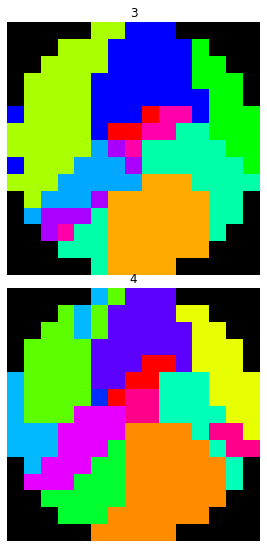

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


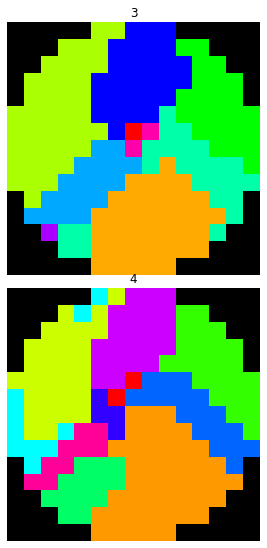

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


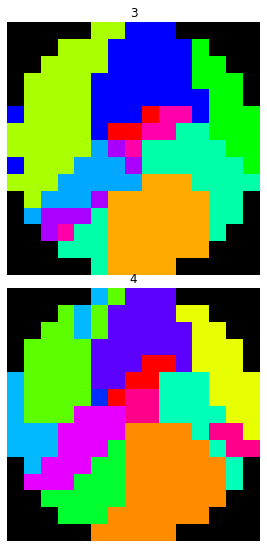

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with the same number of peaks for the given threshold and no. of clusters
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (0,)


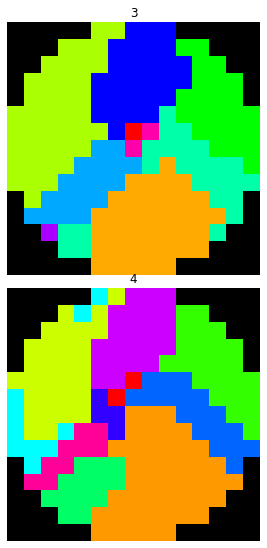

(2, 177)


In [13]:
Big_labels=[]
ami_score_nmfpk3=[]
ar_score_nmfpk3=[]
fm_score_nmfpk3=[]

for i in [0.7,0.8]:
    for j in [0.15,0.2]:
        labels = nmf_cluster(3,5,deal='None',use_peak=1,visualize=0,pear_threshold=i,peak_threshold=3,contri_threshold=j,dataset=1)
        print(np.shape(labels))
        ami_score_nmf = [ami_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ar_score_nmf= [ar_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        fm_score_nmf= [fm_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ami_score_nmfpk3= ami_score_nmfpk3+ami_score_nmf
        ar_score_nmfpk3=ar_score_nmfpk3+ar_score_nmf
        fm_score_nmfpk3=fm_score_nmfpk3+fm_score_nmf
        Big_labels=Big_labels + labels

In [14]:
print(np.shape(ami_score_nmfpk3))

(8,)


In [15]:
score_nmfpk3=[ami_score_nmfpk3,ar_score_nmfpk3,fm_score_nmfpk3]
#score_nmfpk3[0].index(np.max(score_nmfpk3,axis=1)[0])
#avescore_nmfpk2=np.mean(score_nmfpk2,axis=0)
avescore_nmfpk3=np.mean(score_nmfpk3,axis=0)
print(np.shape(score_nmfpk3))
print(np.max(avescore_nmfpk3),np.argmax(avescore_nmfpk3))
avescore_nmfpk3

(3, 8)
0.6788511461927559 3


array([0.64048121, 0.61111773, 0.67399461, 0.67885115, 0.64048121,
       0.61111773, 0.67399461, 0.67885115])

# Take log of dataset

Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlat

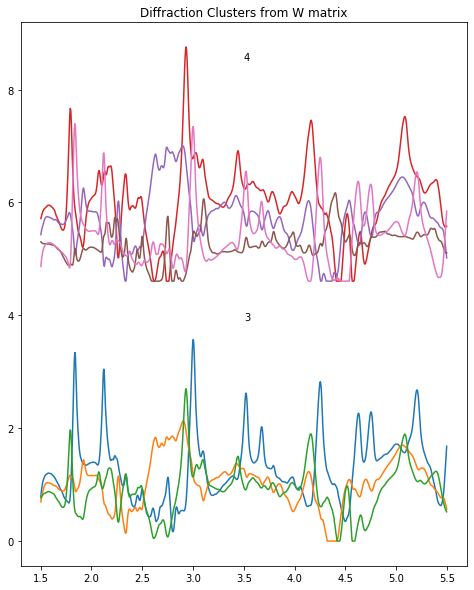

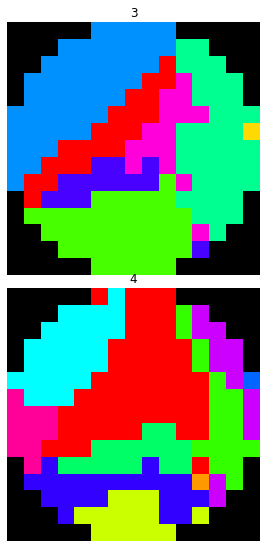

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

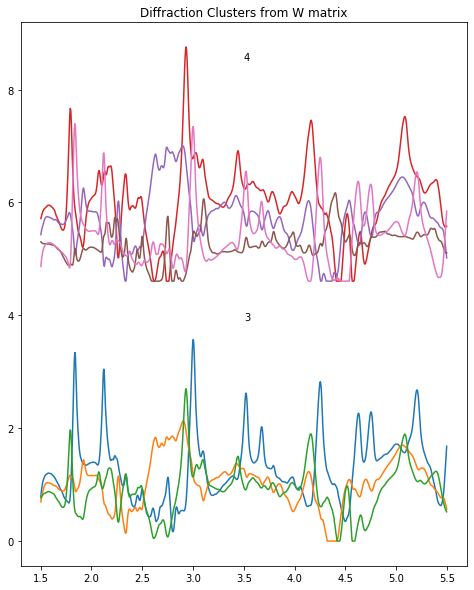

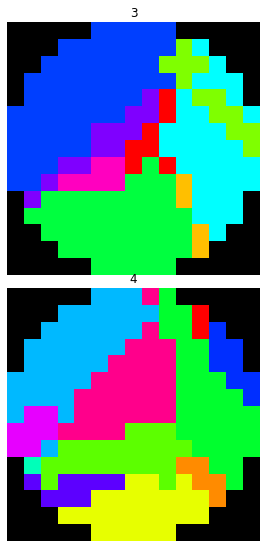

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

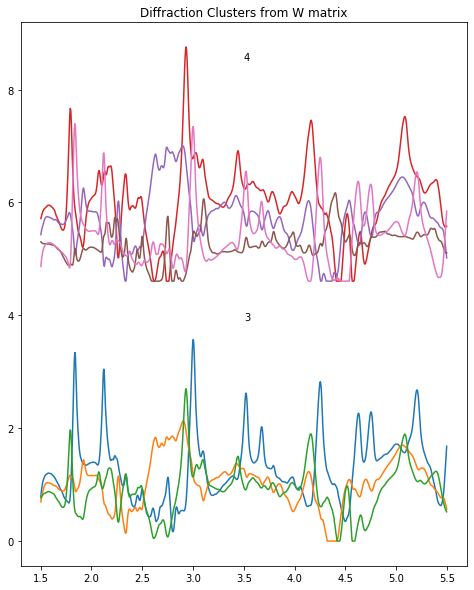

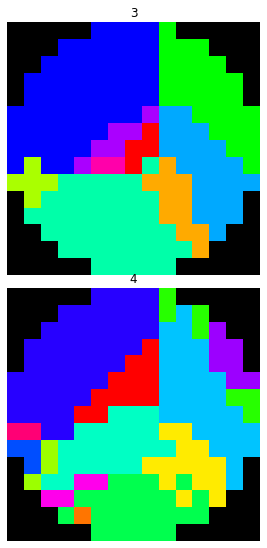

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

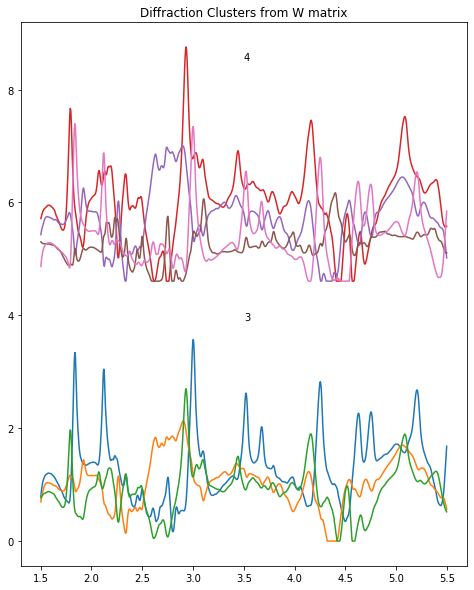

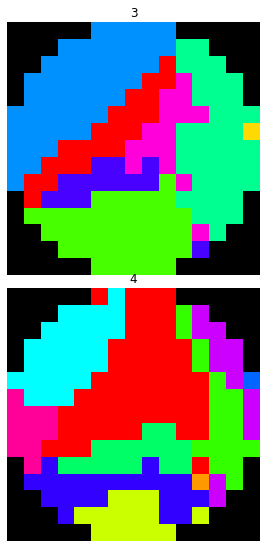

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

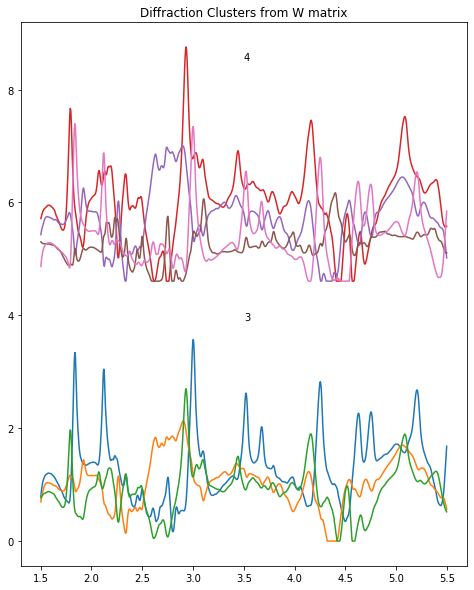

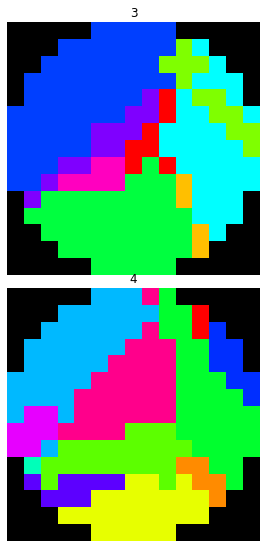

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

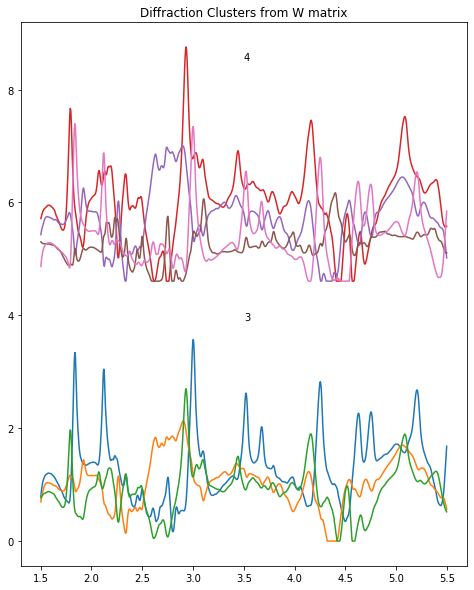

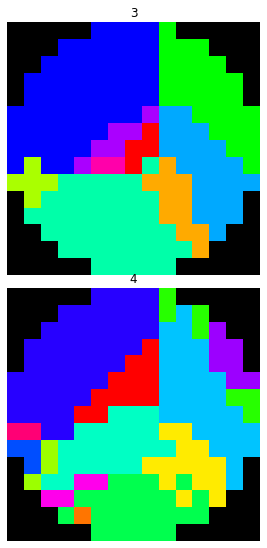

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

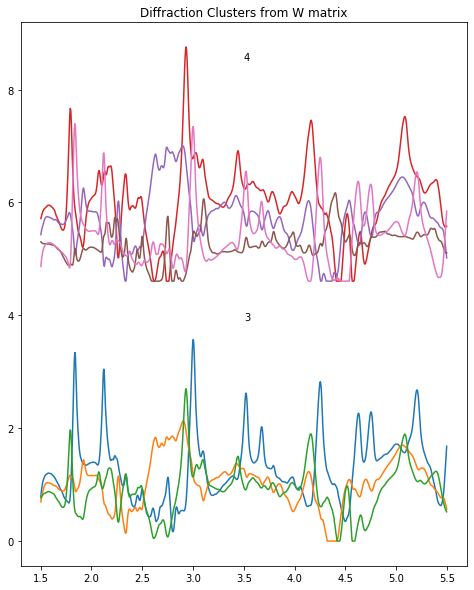

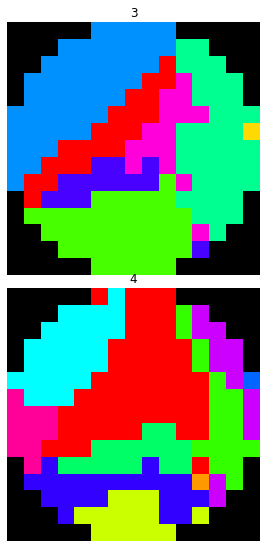

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

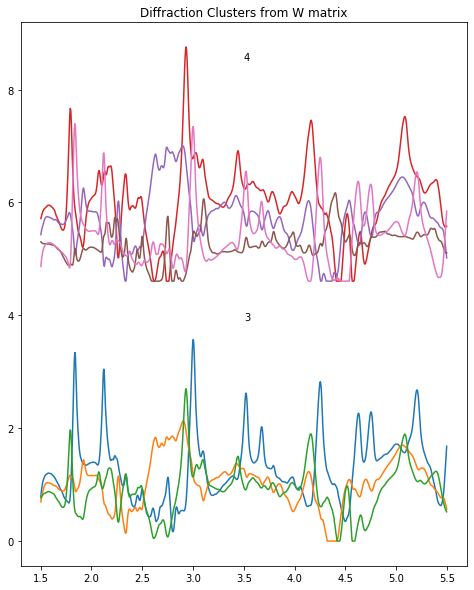

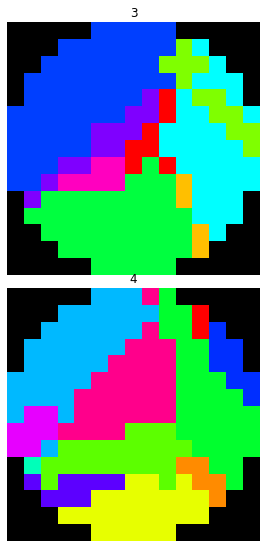

(2, 177)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
.....................................3 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given correlation threshold. No peak shifting will be considered
(0,) (1, 2)
.....................................4 Clusters...........................................
Loading Data from: C:/Users/oluwa/Downloads/TiNiSn_500C-20200714T190740Z-001/TiNiSn_500C/
Data Loaded Succesfully
(177, 800)
No clusters with correlation above or equal to the given

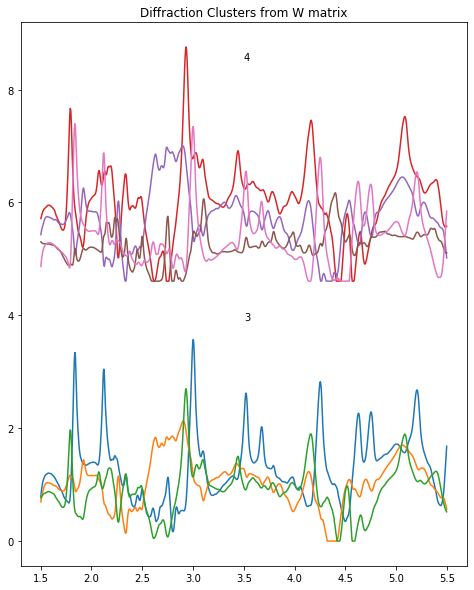

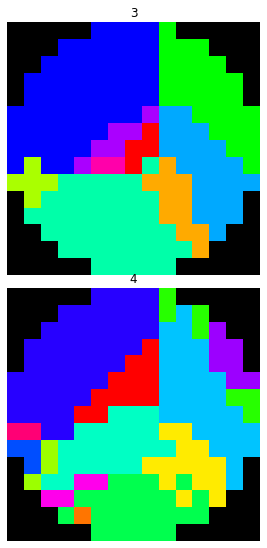

(2, 177)


In [16]:
Big_labels=[]
ami_score_nmfpk3=[]
ar_score_nmfpk3=[]
fm_score_nmfpk3=[]

for i in [0.7,0.8,0.9]:
    for j in [0.15,0.2,0.25]:
        labels = nmf_cluster(3,5,deal="log",use_peak=1,visualize=1,pear_threshold=i,peak_threshold=3,contri_threshold=j)
        print(np.shape(labels))
        ami_score_nmf = [ami_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ar_score_nmf= [ar_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        fm_score_nmf= [fm_score(new_truth_labels,labels[i]) for i in range(len(labels))]
        ami_score_nmfpk3= ami_score_nmfpk3+ami_score_nmf
        ar_score_nmfpk3=ar_score_nmfpk3+ar_score_nmf
        fm_score_nmfpk3=fm_score_nmfpk3+fm_score_nmf
        Big_labels=Big_labels + labels

In [17]:
print(np.shape(ami_score_nmfpk3))

(18,)


In [18]:
score_nmfpk3=[ami_score_nmfpk3,ar_score_nmfpk3,fm_score_nmfpk3]
#score_nmfpk3[0].index(np.max(score_nmfpk3,axis=1)[0])
#avescore_nmfpk2=np.mean(score_nmfpk2,axis=0)
avescore_nmfpk3=np.mean(score_nmfpk3,axis=0)
print(np.shape(score_nmfpk3))
print(np.max(avescore_nmfpk3),np.argmax(avescore_nmfpk3))
avescore_nmfpk3

(3, 18)
0.4871594579263379 2


array([0.43008069, 0.33171078, 0.48715946, 0.39665551, 0.48509582,
       0.46627688, 0.43008069, 0.33171078, 0.48715946, 0.39665551,
       0.48509582, 0.46627688, 0.43008069, 0.33171078, 0.48715946,
       0.39665551, 0.48509582, 0.46627688])

# Checking clusters 4 & 11 to see if any metric could spot them

In [19]:
X = dataGrid.get_data_array()
gridno_4 = [i+1 for i,v in enumerate(new_truth_labels) if v==4]
gridno_11 = [i+1 for i,v in enumerate(new_truth_labels) if v==11]
gridno_4_11 = gridno_4+gridno_11
X1 = X[np.array(gridno_4_11)-1]

(177, 800)


In [20]:
np.transpose(gridno_4)

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23,
       24, 25, 31, 32, 33, 34, 36, 37, 38, 44, 45, 46, 49, 50, 51, 59, 60,
       64, 75])

In [21]:
#for i in range(max(labels)+1):


In [22]:
a = X1[0]
b = X1[1]


nn = [np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))]
#nn = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])
nn

[287.01190927733927, 82375.83606702361, 2823.8616388773416]

In [37]:
def similarity(d1,d2, metric='cosine'):
        power =2
        a = X1[d1]
        b = X1[d2]
        
        a = np.fft.fft(a).real
        b = np.fft.fft(b).real
        #a = np.log(a+1)
        #b = np.log(b+1)
        #a = np.power(a,power)
        #b = np.power(b,power)
        
        if metric == 'AveDist':
            nn = np.mean([np.sqrt(np.sum(np.square(b-a))),np.sum(np.square(b-a)),np.sum(np.abs(b-a))])
            return nn
        
        if metric == 'AveSim':
            corr1, _ = pearsonr(a,b)
            corr1 = 1 - corr1
            dot_product = np.dot(b, a)
            norm_a = np.linalg.norm(a)
            norm_b = np.linalg.norm(b)
            corr2 = 1 - (dot_product / (norm_a * norm_b))
            corr = np.mean([corr1,corr2])   
            
            return corr 
        
        if metric == 'cosine':
            dot_product = np.dot(a, b)
            norm_a = np.linalg.norm(a)
            norm_b = np.linalg.norm(b)
            return 1 - (dot_product / (norm_a * norm_b))
            #return np.abs((dot_product / (norm_a * norm_b)))
            
        if metric == 'Euclidean':
            return np.sqrt(np.sum(np.square(b-a)))
        
        if metric == 'sEuclidean':
            return np.sum(np.square(b-a))
        
        if metric == 'Manhattan':
            return np.sum(np.abs(b-a))
        
        if metric == 'None':
            return np.mean(np.abs(b-a))
        
        
        

(-0.5, 14.5, -0.5, 14.5)

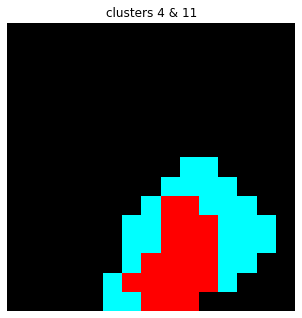

In [42]:
size = len(gridno_4_11)

D = np.ones(shape=(size,size))
for x in range(size):
    for y in range(size):
        D[x,y] = similarity(x,y,'None')

agg = AgglomerativeClustering(n_clusters=2,compute_full_tree = True, affinity='precomputed' ,linkage='complete')
agg.fit(D)
labels=agg.labels_


# #This part of the code is a savior
# new_gridno_4_11=[None]*len(gridno_4_11)
# for ii in range(0,len(gridno_4_11)):
#     x,y=dataGrid.coord(gridno_4_11[ii])
#     new_grid=dataGrid.grid_num(16-x,y)
#     #print(new_grid)
#     new_gridno_4_11[ii]=new_grid




hues = [float(float(x)/float(max(labels)+1)) for x in range(1,max(labels)+2)]
cluster_grid = np.zeros(shape = (15,15,3))
for val in range(0,len(gridno_4_11)):
    x,y = dataGrid.coord(gridno_4_11[val])
    cluster = labels[val]
    #cluster = new_labels[val-1]
    #print(cluster)
    cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])
    #cluster_grid[y-1][x-1] = matplotlib.colors.hsv_to_rgb([hues[cluster],1,1])

    
#Show on a wafer map
ax=plt.figure(figsize=(4,4))
ax.tight_layout()
ax=ax.add_axes([0,0,1,1])

#ax = fig.add_subplot(1,b-a,i-a+1)
plt.imshow(cluster_grid)
ax.set_title('clusters 4 & 11')
ax.invert_yaxis()
ax.axis("off")

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23,
       24, 25, 31, 32, 33, 34, 36, 37, 38, 44, 45, 46, 49, 50, 51, 59, 60,
       64, 75, 35, 47, 48, 61, 62, 63, 76, 77, 78, 91, 92])

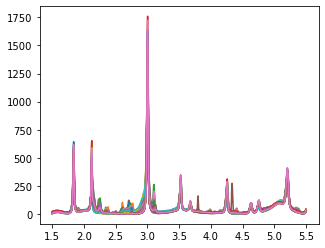

In [25]:
fig, ax = plt.subplots(figsize=(5,4))
pp = 0
for j in range(max(labels)+1):
    
    ilabels = [i for i,v in enumerate(labels) if v==j]
    #labels_11= [i+1 for i,v in enumerate(truth_labels) if v==9]
    #print(np.transpose(labels_4))

    
    for ii in ilabels:
        ax.plot(x_data,y_data[gridno_4_11[ii]-1]+pp)
    
    pp +=0

np.transpose(gridno_4_11)

In [26]:
np.transpose(gridno_4)

array([ 1,  2,  3,  4,  5,  8,  9, 10, 11, 12, 13, 14, 19, 20, 21, 22, 23,
       24, 25, 31, 32, 33, 34, 36, 37, 38, 44, 45, 46, 49, 50, 51, 59, 60,
       64, 75])

TypeError: cannot unpack non-iterable AxesSubplot object

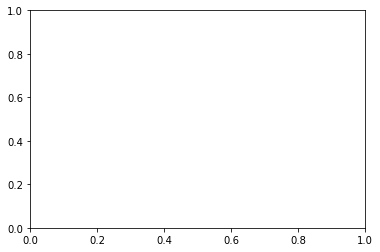

In [27]:
fig, ax = plt.subplot()
for i in gridno_4:    
    ax.plot(x_data,y_data[i-1],'r')
    
fig, ax = plt.subplot()
for i in gridno_11:
    ax.plot(x_data,y_data[i-1],'b')

plt.title('Clusters 4 & 11')

In [ ]:
np.transpose([gridno_4_11[v] for i,v in enumerate(ilabels)])

In [ ]:
np.transpose(new_truth_labels)

In [ ]:
labels

In [ ]:
np.transpose(gridno_4_11)

In [ ]:
labels